### Loading Data

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# load all csvs from ../log/parallel and ../log/sequential
parallel_times = []
for i in range(1, 6):
    df = pd.read_csv(f'../log/parallel/parallel_{i}.csv')
    time = df['Execution Time (seconds)'].values[0]
    parallel_times.append(time)

sequential_times = []
for i in range(1, 6):
    df = pd.read_csv(f'../log/sequential/sequential_{i}.csv')
    time = df['Execution Time (seconds)'].values[0]
    sequential_times.append(time)

# average the times
parallel_avg = np.mean(parallel_times)
sequential_avg = np.mean(sequential_times)

# load python times
python_avg = pd.read_csv('../log/python_parallel/python_parallel.csv')['time_sec'].mean()

#data to minutes
parallel_avg = parallel_avg / 60
sequential_avg = sequential_avg / 60
python_avg = python_avg / 60

### Plotting Data

/tmp/ipykernel_104472/3094774167.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Version', y='Execution Time (minutes)', data=df, palette='Blues_d')


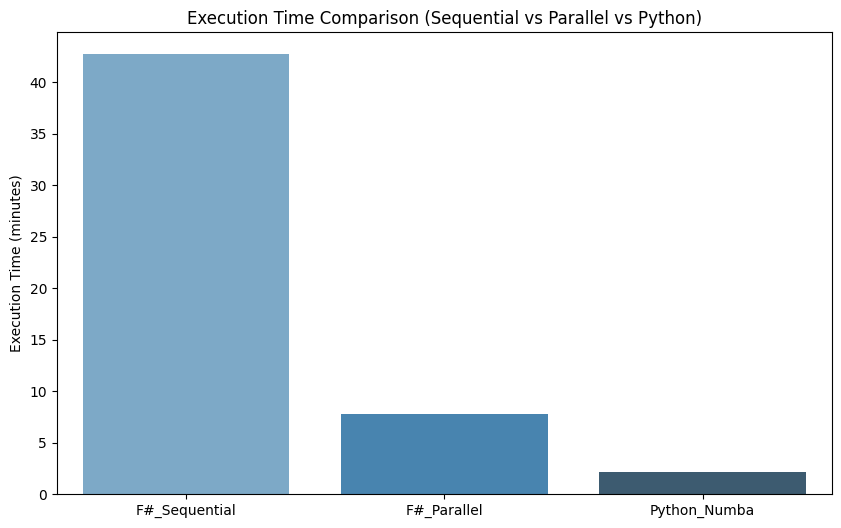

In [3]:
speedup_parallel = sequential_avg / parallel_avg
speedup_python = python_avg / parallel_avg

# Data for plotting
data = {
    'Version': ['F#_Sequential', 'F#_Parallel', 'Python_Numba'],
    'Execution Time (minutes)': [sequential_avg, parallel_avg, python_avg],
    'Speedup': [1, speedup_parallel, speedup_python]
}

df = pd.DataFrame(data)

# Plotting Execution Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Version', y='Execution Time (minutes)', data=df, palette='Blues_d')
plt.title('Execution Time Comparison (Sequential vs Parallel vs Python)')
plt.ylabel('Execution Time (minutes)')
plt.xlabel('')
plt.show()



| Version         | Average Time (minutes) | Speedup vs Previous |
|----------------|------------------------|----------------------|
| F# Sequential   | 42.73                 | -                    |
| F# Parallel     | 7.80                  | 5.48×                |
| Python Numba    | 2.19                  | 3.56×                |


In [4]:
print(f"F# Sequential Average Time: {sequential_avg:.2f} minutes")
print(f"F# Parallel Average Time: {parallel_avg:.2f} minutes")
print(f"Python Numba Average Time: {python_avg:.2f} minutes")

F# Sequential Average Time: 42.73 minutes
F# Parallel Average Time: 7.80 minutes
Python Numba Average Time: 2.19 minutes


### Simulate for the 